## Happy Customers

### Context: 
We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

### Objective : 

* To identify the different factors that makes a customer unhappy
* To make a model to predict if customer is happy or not
* To identify features that are more important for predicting customer's happiness
* To reach 73% accuracy score or above


### Dataset :
The data contains demographic details, work-related metrics and attrition flag.

* **Y**  - Targe attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
* **X1** - My order was delivered on time
* **X2** - Contents of my order was as expected
* **X3** - I ordered everything I wanted
* **X4** - I paid a good price for my order
* **X5** - I am satisfied with my courier
* **X6** - The app makes ordering easy for me

### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score

#for tuning the model
from sklearn.model_selection import GridSearchCV

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Read the dataset and do initial exploration

In [2]:
#reading the dataset
df = pd.read_csv('ACME-HappinessSurvey2020.csv')

In [3]:
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


**Observation:**
- There are 126 observations and 7 columns.
- There are no missing values in the data.

### Let's rename the columns for readibility

In [5]:
# Renaming the columns for readibility
df.columns = ['Target','Delivered_on_Time', 'Contents_as_expected', 
              'Found_everything', 'Good_Price', 'Satisfied_with_courier', 'App_ease']

### Checking column statistics

In [6]:
#Checking summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Target,126.0,0.547619,0.499714,0.0,0.0,1.0,1.0,1.0
Delivered_on_Time,126.0,4.333333,0.800000,1.0,4.0,5.0,5.0,5.0
Contents_as_expected,126.0,2.531746,1.114892,1.0,2.0,3.0,3.0,5.0
Found_everything,126.0,3.309524,1.023440,1.0,3.0,3.0,4.0,5.0
Good_Price,126.0,3.746032,0.875776,1.0,3.0,4.0,4.0,5.0
Satisfied_with_courier,126.0,3.650794,1.147641,1.0,3.0,4.0,4.0,5.0
App_ease,126.0,4.253968,0.809311,1.0,4.0,4.0,5.0,5.0


- **Average score for delivery on Time** is **4.33** out of 5.  This isn't bad.
- **Similarly Ease of ordering** with the app is around **4.25**.  Both these items are not bad. 
- **Content as expected** comes in low at **2.5** average. Wonder what happened here and if it's a big factor in customer disatisfaction.  
- **Satisfied with courier** comes in at a **3.65**.
- **Found everyting also comes in** close at about **3.3**.

Let's explore these variables in some more depth by observing their distributions

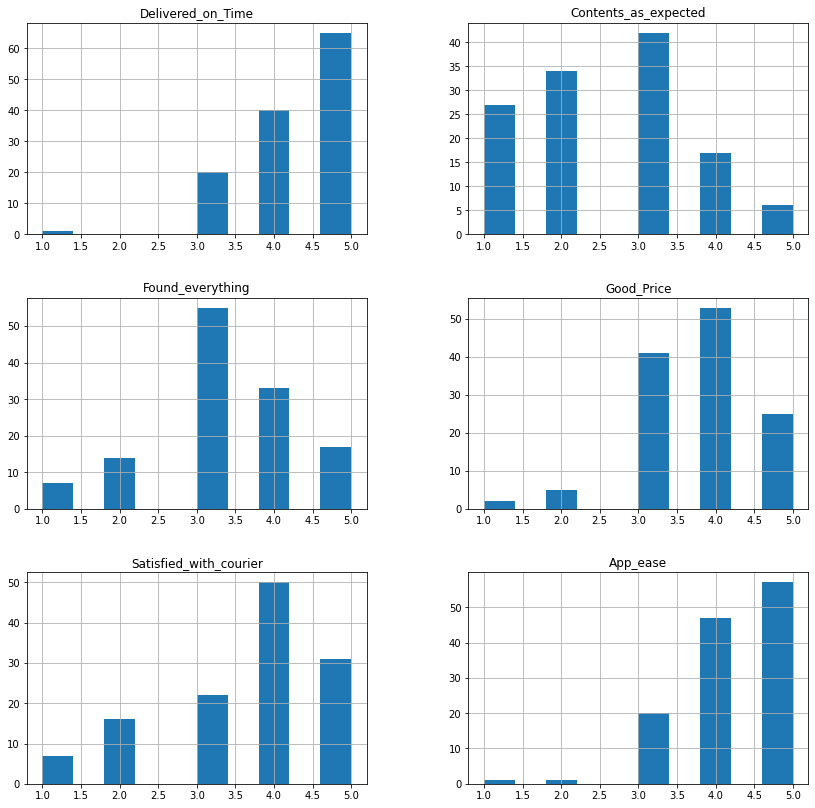

In [7]:
#creating histograms
df.loc[:, df.columns != 'Target'].hist(figsize=(14,14)) 
plt.show()

**Observations:**

- **Delivered on Time** and **App ease** tended towards the higher values of **4's and 5's** with very few low scores.

- **Contents as expected** and **Found everything** is a little more spotty.  The scores are almost normally distributed **around 3**. 

- **Satisfied with courier** is rated most at **4's but has some scores at 3, 2 and 1's**, indicating not uniform satisfaction here.  

- **Price** does not seem to be a huge factor, **mostly in the upper numbers** but we'll see if that's a factor is customer satisfaction.

### Bivariate analysis

**Let's now check how does customer satisfaction rate is related with other variables**

In [8]:
cols = df.columns

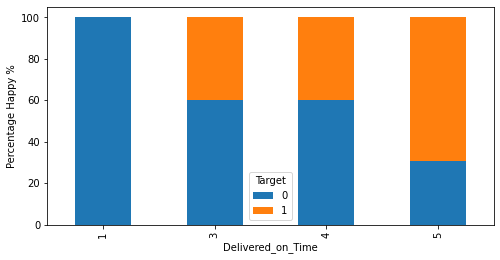

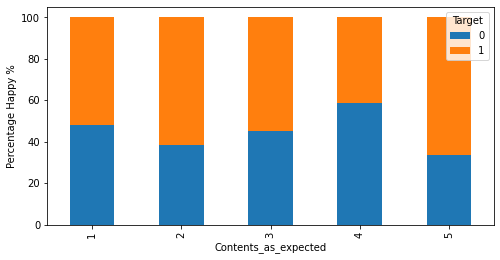

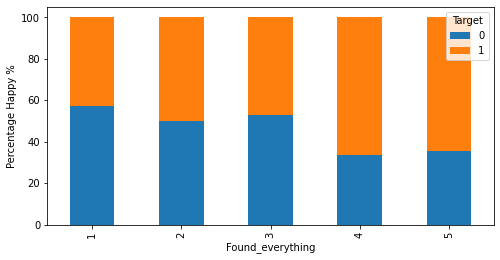

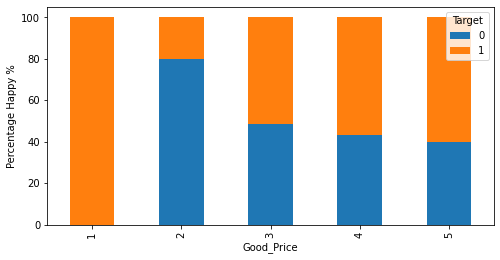

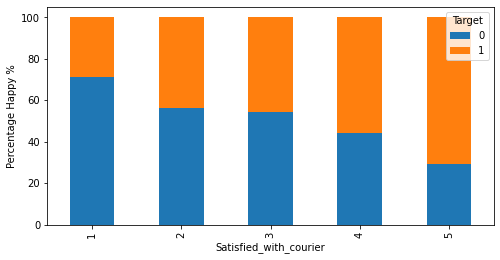

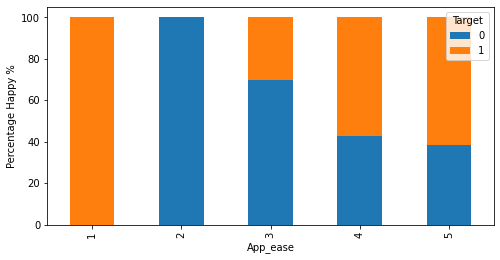

In [9]:
for i in cols:
    if i!='Target':
        (pd.crosstab(df[i],df['Target'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage Happy %')

**Observations:**
    
- **Delivered on time** and **Satisfaction with courior** seems to have a bigger affect on customer satisfaction, see that the higher rate of unhappiness as the score get's lower.
- **Pricing** and **Ease of app use** seems to have some factor on customer satisfaction but not as strong. 
- **Found everything** and **Content as expected** has uniform distribution across the scores so it does't seem to be a huge factor in whether customers are satisfied or not. 


### Let's check the relationship between different numerical variables

In [10]:
# Creating a mask to mask off top half of correlation heatmap
mask = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

<AxesSubplot:>

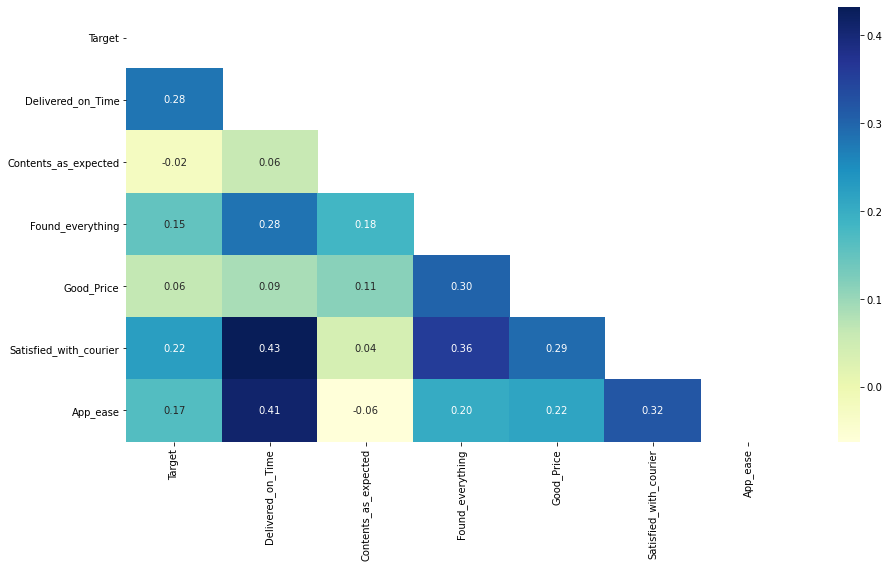

In [11]:
#plotting the correation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, fmt='0.2f', cmap='YlGnBu', mask=mask)

**Observations:**

- **Delivered on time** and **Satisfaction with courior** shows the highest correlation with the target variable at **28% and 22%** respectively, as expected. 
- **Found everything** and **Ease of app use** are next highest correlation at **17% and 15%**, respectively. 
- **Pricing** and **Content as expected** have the lowest correlation to the target variable. 
- Interestingly, **Delivered on time** and **Satisfaction with courior** are highly correlated with each other, possibly indicating that when the order is not delivered on time, the customer is disatisfied with the courier, which makes sense.  

**Now that we have explored our data. Let's build the model**

## Model Building - Approach
1. Prepare data for modeling
2. Partition the data into train and test set.
3. Build model on the train data.
4. Tune the model if required.
5. Test the data on test set.

###  Preparing data for modeling

**Separating the independent variables (X) and the dependent variable (Y)**

In [12]:
#Separating target variable and other variables
Y= df.Target
X= df.drop(columns = ['Target'])

### Splitting the data into 65% train and 35% test set

In [13]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.35,random_state=1,stratify=Y)

### Model evaluation criterion

#### The model can make two types of wrong predictions:
1. Predicting a customer is unhappy when the customer is not unhappy
2. Predicting a customer is happy when the customer is unhappy

#### Which case is more important? 
* **Predicting that the is happy when the customer is unhappy** i.e. losing a valuable customer. This would be considered a major miss for our predictor, and is hence the more important case of wrong predictions.

#### How to reduce this loss i.e the need to reduce False Positives?
* **The company would want the Precision to be maximized**, the greater the Recall, the higher the chances of minimizing false negatives. Hence, the focus should be on increasing Precision (minimizing the false positives) or in other words identifying the true negatives (i.e. Class 2) very well, so that the company can provide strategies to increase satisfaction rate. This would help in optimizing the overall focus towards customer satisfaction.

Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.

In [14]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Happy', 'Happy'], yticklabels=['Not Happy', 'Happy'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

#### Building the model

We will be building 7 different models:
- **Logistic Regression**
- **K Nearest Neighbors (KNN)**
- **Linear Discriminant Analysis (LDA)**
- **Quadratic Discriminant Analysis (QDA)**
- **XG Boost**
- **Decision Tree**
- **Random Forest**

### Logistic Regression Model 

- Logistic Regression is a supervised learning algorithm which is used for **binary classification problems** i.e. where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event y, given some features x as:

                                          P(y)=1/exp(1 + exp(-x))

In [15]:
#fitting logistic regression model
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

**Checking model performance**

              precision    recall  f1-score   support

           0       0.59      0.51      0.55        37
           1       0.63      0.70      0.67        44

    accuracy                           0.62        81
   macro avg       0.61      0.61      0.61        81
weighted avg       0.61      0.62      0.61        81



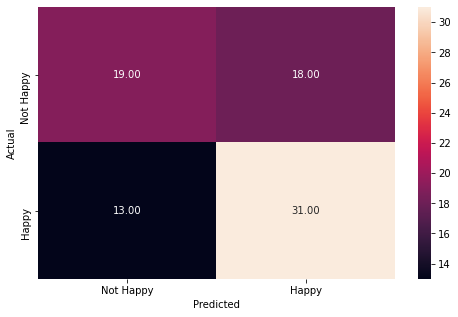

In [16]:
#checking the performance on the training data
y_pred_train = lg.predict(x_train)
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.53      0.50      0.51        20
           1       0.62      0.64      0.63        25

    accuracy                           0.58        45
   macro avg       0.57      0.57      0.57        45
weighted avg       0.58      0.58      0.58        45



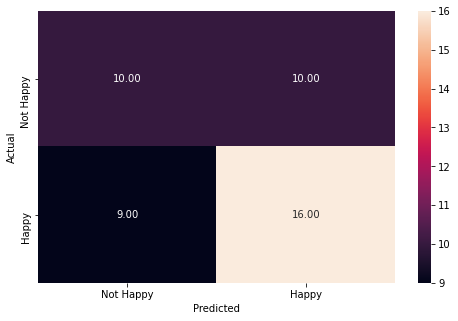

In [17]:
#checking the performance on the test dataset
y_pred_test = lg.predict(x_test)
metrics_score(y_test, y_pred_test)

- The reported average includes the macro average which averages the unweighted mean per label, and the weighted average i.e. averaging the support-weighted mean per label.
- In classification, the class of interest is considered the positive class. Here, the class of interest is 1 i.e. identifying happy customers.

**Reading the confusion matrix (clockwise):**

* False Positive (Actual=0, Predicted=1): Model predicts that a customer is happy and the customer is not happy

* True Positive (Actual=1, Predicted=1): Model predicts that a customer is unhappy and the customer is unhappy 

* False Negative (Actual=1, Predicted=0): Model predicts that a customer is unhappy and the customer is not unhappy

* True Negative (Actual=0, Predicted=0): Model predicts that a customer is unhappy and the customer is unhappy 

**Observations:**
- The model is not performing well in terms of accuracy.
- The precision for class 1 is quite low (**62%**) in the test score, which implies that this model will not perform well in differentiating customers who are unhappy. 
- The model is giving a **64%** in recall, also not that high.  

**Let's check the coefficients and find which variables are leading to customer disatifaction**

In [18]:
#printing the coefficients of logistic regression
cols=X.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

,0
Satisfied_with_courier,0.391698
Delivered_on_Time,0.297239
Found_everything,0.200508
App_ease,0.159276
Good_Price,0.096947
Contents_as_expected,-0.240123


**Observations:**

**Features with strong positive affect on the happiness rate are:**
- Satisfied with courier	
- Delivered on time	
- Found everything

**Features which string negative affect on the attrition rate are:**
- Content as expected

The coefficients of the logistic regression model give us the log of odds, which is hard to interpret in the real world. We can convert the log of odds into real odds by taking its exponential.

In [19]:
odds = np.exp(lg.coef_[0]) #finding the odds

# adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, x_train.columns, columns=['odds']).sort_values(by='odds', ascending=False) 

,odds
Satisfied_with_courier,1.479491
Delivered_on_Time,1.346137
Found_everything,1.222023
App_ease,1.172662
Good_Price,1.101802
Contents_as_expected,0.786531


- The odds of a customer who is **satisfied with the courier** to be happy are **1.48 times** the odds of one who is not, probably due to the fact that the courier is the human component that the customer deals with and the customer's disatisfaction links back to the company. 
- The odds of customer receiving a **delivery on time** being happy is **1.35** the odds of a customer receiving a package late being happy.
- The odds of a customer who **found everything** they're looking for being happy is **1.22 times (22% higher than)** the odds of customers who didn't everything they're looking for.

**Precision-Recall Curve for logistic regression**

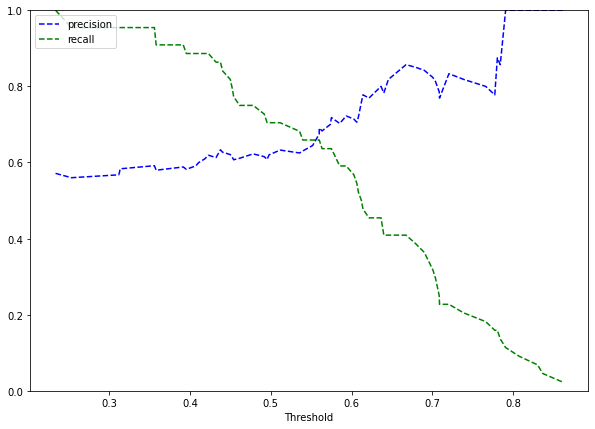

In [20]:
y_scores_lg=lg.predict_proba(x_train) #predict_proba gives the probability of each observation belonging to each class

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Observation:**
- We can see that precision and recall are balanced for a threshold of about ~**0.55**.

**Let's find out the performance of the model at this threshold**

              precision    recall  f1-score   support

           0       0.58      0.57      0.58        37
           1       0.64      0.66      0.65        44

    accuracy                           0.62        81
   macro avg       0.61      0.61      0.61        81
weighted avg       0.62      0.62      0.62        81



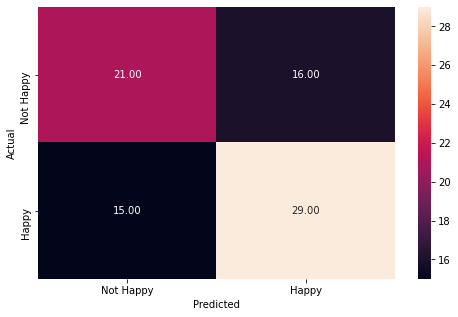

In [21]:
optimal_threshold1=.55
y_pred_train = lg.predict_proba(x_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold1)

- **The model performance has hot improved**
- Let's check the performance on the test data.

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        20
           1       0.60      0.60      0.60        25

    accuracy                           0.56        45
   macro avg       0.55      0.55      0.55        45
weighted avg       0.56      0.56      0.56        45



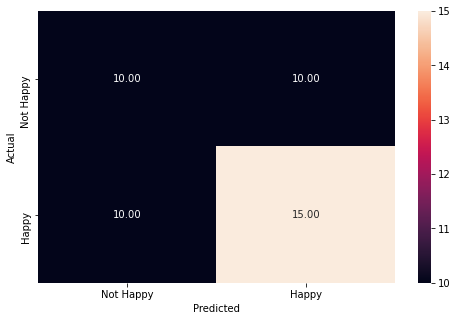

In [22]:
optimal_threshold1=.55
y_pred_test = lg.predict_proba(x_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

**Observation:**
- The model has **not improved**, in fact it has dropped to **60%** precision, **60%** recall. The average recall and precision for the model are not optimal but let's see if we can get better performance using other algorithms. 

### K- Nearest Neighbors (KNN) Model 

KNN uses similar features to predict the values of new data points, which means the new data point will be assigned a value based on how similar it is to the data points in the training set. 


The following steps are performed in KNN:

- Select K
- Calculate distance (Euclidean, Manhattan, etc.)
- Find the K closest neighbors
- Vote for labels

The “K” in the KNN algorithm is the nearest neighbor we wish to take the vote from. Generally, K is taken to be an odd number when the no. of classes are even, so as to get a majority vote. Let's say K = 3. In that case, we will make a circle with the new data point as the center just as big as enclosing only the three nearest data points on the plane.

**But before actually building the model, we need to identify the value of K to be used in KNN. We will perform the following steps for the same.**

- For every value of K (from 1 to 15), split the train set into new train and validation set (30 times)
- Scale the training data and validation data
- Take the average of the error on these train and the validation sets for each K
- Plot the average train vs the validation set error for all Ks 
- Choose a suitable K from the plot where the two errors are comparable

In [23]:
knn = KNeighborsClassifier()

# We select the best value of k for which the error rate is the least in the validation data
# Let us loop over a few values of the k to determine the best k
train_error = []
test_error = []
knn_many_split = {}

error_df_knn = pd.DataFrame()
features = X.columns

for k in range(1,15):
    train_error = []
    test_error = []
    lista = []
    knn = KNeighborsClassifier(n_neighbors=k)
    for i in range(30):
        x_train_new, x_val, y_train_new, y_val = train_test_split(x_train, y_train, test_size = 0.35)
    
        #Fitting knn on training data
        knn.fit(x_train_new, y_train_new)
        #Calculating error on training and validation data
        train_error.append(1 - knn.score(x_train_new, y_train_new)) 
        test_error.append(1 - knn.score(x_val, y_val))
    lista.append(sum(train_error)/len(train_error))
    lista.append(sum(test_error)/len(test_error))
    knn_many_split[k] = lista

knn_many_split

{1: [0.04423076923076922, 0.4540229885057471],
 2: [0.20576923076923087, 0.48045977011494234],
 3: [0.2371794871794872, 0.47816091954022977],
 4: [0.26346153846153847, 0.4942528735632184],
 5: [0.29679487179487174, 0.48620689655172417],
 6: [0.325, 0.5218390804597701],
 7: [0.333974358974359, 0.4977011494252873],
 8: [0.35833333333333334, 0.5068965517241378],
 9: [0.3570512820512821, 0.47241379310344833],
 10: [0.3467948717948718, 0.4919540229885057],
 11: [0.366025641025641, 0.49999999999999983],
 12: [0.38076923076923086, 0.4770114942528736],
 13: [0.37884615384615394, 0.4758620689655171],
 14: [0.3737179487179487, 0.4724137931034483]}

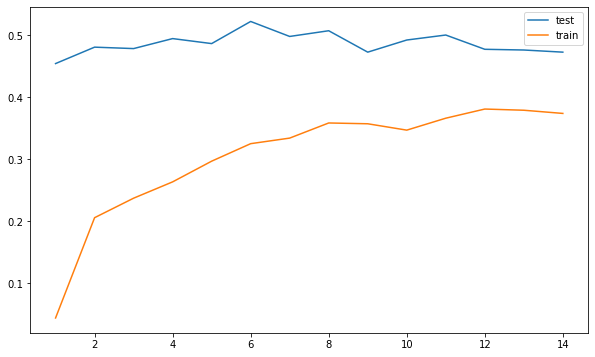

In [24]:
kltest = []
vltest = []
for k, v in knn_many_split.items():
    kltest.append(k)
    vltest.append(knn_many_split[k][1])

kltrain = []
vltrain = []

for k, v in knn_many_split.items():
    kltrain.append(k)
    vltrain.append(knn_many_split[k][0])

# Plotting k vs error error
plt.figure(figsize=(10,6))
plt.plot(kltest,vltest, label = 'test' )
plt.plot(kltrain,vltrain, label = 'train')
plt.legend()
plt.show()

- We can see that the test error is more or less similar for K greater than or equal to 5. But the train error keeps increasing with increasing K.
- This implies that we would get a lower train and test error if we choose K = 5. Also, if we choose a high value of K, the model would get biased due to the imbalance in the dataset.
- So, let's fit the KNN model with **K = 5** on the entire training set.

In [25]:
#define knn model
knn=KNeighborsClassifier(n_neighbors=5)

In [26]:
#fitting data to the KNN model
knn.fit(x_train,y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.71      0.59      0.65        37
           1       0.70      0.80      0.74        44

    accuracy                           0.70        81
   macro avg       0.70      0.70      0.70        81
weighted avg       0.70      0.70      0.70        81



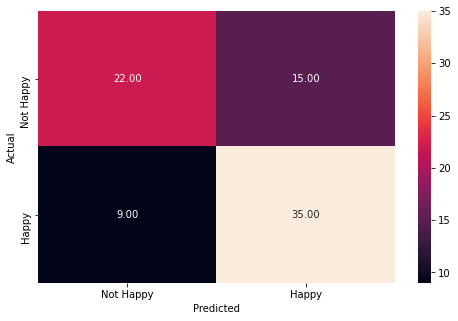

In [27]:
#checking the performance of knn model
y_pred_train_knn = knn.predict(x_train)
metrics_score(y_train, y_pred_train_knn)

              precision    recall  f1-score   support

           0       0.48      0.50      0.49        20
           1       0.58      0.56      0.57        25

    accuracy                           0.53        45
   macro avg       0.53      0.53      0.53        45
weighted avg       0.54      0.53      0.53        45



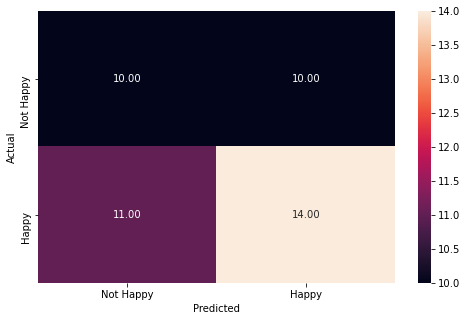

In [28]:
y_pred_test_knn = knn.predict(x_test)
metrics_score(y_test, y_pred_test_knn)

- The model performs very well on the training set but not has well on the test set which implies the model is **overfitting**.
- The test score is **58%** for **precision**, 2% less than the logistic regression model and **56%** recall score, which is 4% less than the logistic regression model.

**Let's try to fine tune this model and check if we could increase the Recall.**

### Using GridSearchCV for Hyperparameter tuning model

* Hyperparameter tuning is tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation.
* **Grid search** is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

-> **n_neighborsin**

- Number of neighbors to use by default for kneighbors queries.

-> **weights={‘uniform’, ‘distance’}**
- uniform : uniform weights. All points in each neighborhood are weighted equally.
- distance : weight points by the inverse of their distance. In this case, the closer neighbors of a query point will have a greater influence than neighbors which are further away.

-> **p**

- When p = 1, this is equivalent to using manhattan_distance (L1), and euclidean_distance (L2) is used for p = 2.


In [29]:
params_knn={'n_neighbors':np.arange(3,15),'weights':['uniform','distance'],'p':[1,2]}

grid_knn=GridSearchCV(estimator=knn,param_grid=params_knn,scoring='recall',cv=10)

model_knn=grid_knn.fit(x_train,y_train)

knn_estimator = model_knn.best_estimator_
print(knn_estimator)

KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')


- The best hyperparameters for the KNN classifier are n_neighbors=3, weights='distance', and p=1

**Let's use these parameters to build the new KNN model and find the recall of that model.**

In [30]:
#Fit the best estimator on the training data
knn_estimator.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        37
           1       1.00      0.86      0.93        44

    accuracy                           0.93        81
   macro avg       0.93      0.93      0.93        81
weighted avg       0.94      0.93      0.93        81



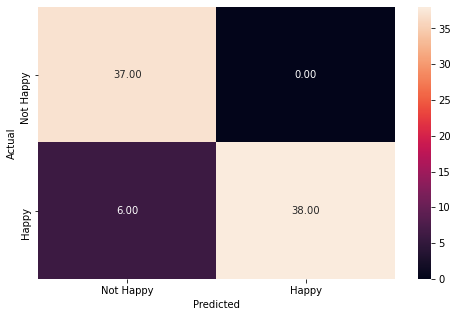

In [31]:
y_pred_train_knn_estimator = knn_estimator.predict(x_train)
metrics_score(y_train, y_pred_train_knn_estimator)

              precision    recall  f1-score   support

           0       0.42      0.55      0.48        20
           1       0.53      0.40      0.45        25

    accuracy                           0.47        45
   macro avg       0.47      0.48      0.47        45
weighted avg       0.48      0.47      0.47        45



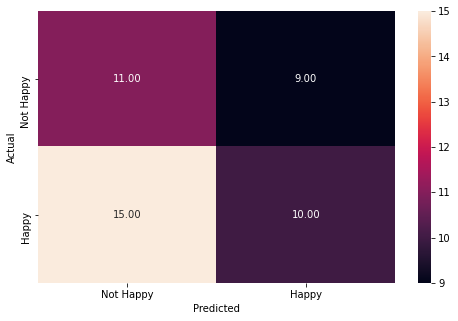

In [32]:
y_pred_test_knn_estimator = knn_estimator.predict(x_test)
metrics_score(y_test, y_pred_test_knn_estimator)

**Observations:**
- This model still seems to be overfitting - performance scores on the training set improved by the got worse in the test set. 
- **Test recall and precision have decreased** by tuning the KNN classifier.
- This appears to be a low-performing model that the company can use to help improve customer satisfaction. There is about an **53% chance** that the model will detect customer satisfaction, and the company will hence be not be able to take the appropriate action.

### Linear Discriminant Analysis

Linear discriminant analysis (LDA) is generally used to classify patterns between two classes; however, it can be extended to classify multiple patterns. LDA assumes that all classes are linearly separable and according to this, multiple linear discrimination functions representing several hyperplanes in the feature space are created to distinguish between the classes. If there are two classes, then the LDA draws one hyperplane and projects the data onto this hyperplane in such a way as to maximize the separation of the two categories. This hyperplane is created according to two criteria considered simultaneously:

- Maximizing the distance between the means of two classes;
- Minimizing the variation between each category.

In [33]:
#fitting lda model
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

**Checking Model Performance**

              precision    recall  f1-score   support

           0       0.57      0.46      0.51        37
           1       0.61      0.70      0.65        44

    accuracy                           0.59        81
   macro avg       0.59      0.58      0.58        81
weighted avg       0.59      0.59      0.59        81



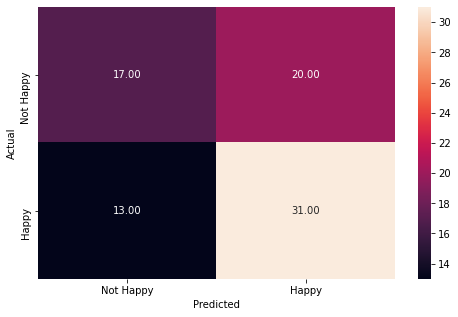

In [34]:
#checking model performace of lda
y_pred_train_lda = lda.predict(x_train)
metrics_score(y_train, y_pred_train_lda)

              precision    recall  f1-score   support

           0       0.56      0.50      0.53        20
           1       0.63      0.68      0.65        25

    accuracy                           0.60        45
   macro avg       0.59      0.59      0.59        45
weighted avg       0.60      0.60      0.60        45



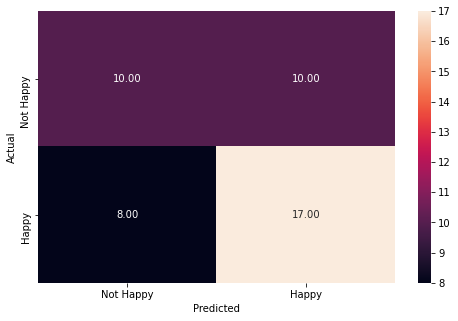

In [70]:
y_pred_test_lda = lda.predict(x_test)
metrics_score(y_test, y_pred_test_lda)

We have built the LDA model. 

**Now, let's check the coefficients and find which variables are leading to attrition and which can help to reduce the attrition**

In [35]:
#creating list of column names
cols=X.columns

#saving coefficients of lda model
coef_lda=lda.coef_

#printing the cofficients of lda
pd.DataFrame(coef_lda,columns=cols).T.sort_values(by=0,ascending=False)

,0
Satisfied_with_courier,0.411728
Delivered_on_Time,0.296392
Found_everything,0.192228
App_ease,0.162375
Good_Price,0.091810
Contents_as_expected,-0.247869


**Features with strong positive affect on the happiness rate are:**
- Satisfied with courier	
- Delivered on time	
- Found everything

**Features which string negative affect on the attrition rate are:**
- Content as expected

**Observations:**

- The LDA model highlights the same features as the logistic regression model as features that affect customer satisfaction rate. 
- Based on the LDA model and the logistic regression model, **Satisfied with courier is the most important featuer** in detecting whether a customer is happy or not.
- The second most important factor is if the customer receives thier **delivery on time**.

#### Precision-Recall Curve for LDA

**Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.**

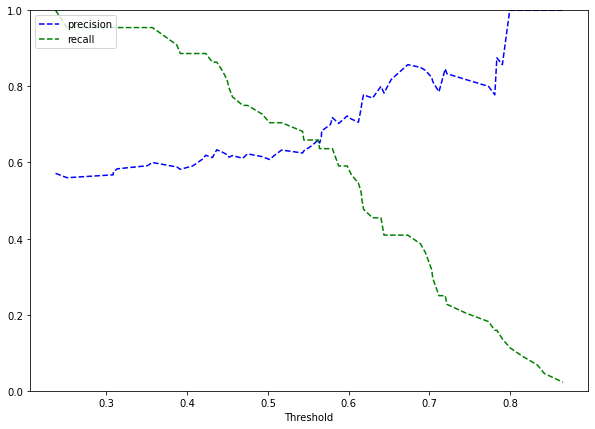

In [36]:
y_scores_lda=lda.predict_proba(x_train) #predict_proba gives the probability of each observation belonging to each class


precisions_lda, recalls_lda, thresholds_lda = precision_recall_curve(y_train, y_scores_lda[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lda, precisions_lda[:-1], 'b--', label='precision')
plt.plot(thresholds_lda, recalls_lda[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Observation:**
- We can see that precision and recall are balanced for a threshold of about ~0.55.

**Let's check the model performance at this threshold**

              precision    recall  f1-score   support

           0       0.58      0.57      0.58        37
           1       0.64      0.66      0.65        44

    accuracy                           0.62        81
   macro avg       0.61      0.61      0.61        81
weighted avg       0.62      0.62      0.62        81



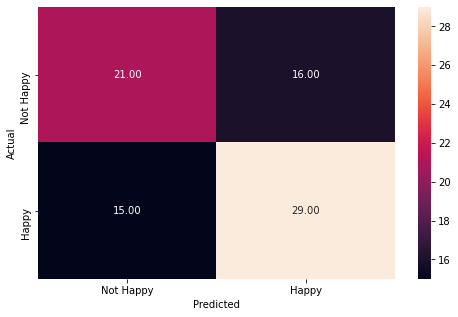

In [37]:
optimal_threshold1=.55
y_pred_train_lda = lda.predict_proba(x_train)
metrics_score(y_train, y_pred_train_lda[:,1]>optimal_threshold1)

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        20
           1       0.60      0.60      0.60        25

    accuracy                           0.56        45
   macro avg       0.55      0.55      0.55        45
weighted avg       0.56      0.56      0.56        45



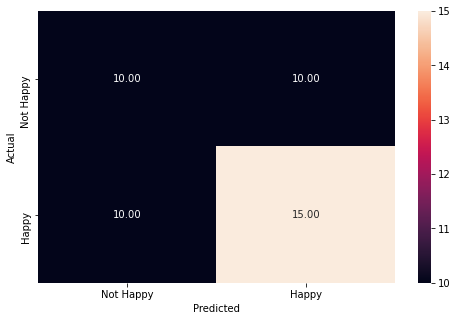

In [38]:
optimal_threshold1=.55
y_pred_test_lda = lda.predict_proba(x_test)
metrics_score(y_test, y_pred_test_lda[:,1]>optimal_threshold1)

**Observation:**
- The model is giving **similar performance on the test and train data**, meaning the model has generalized well.
- **The average recall and precision for the model** is 60%, same as logistic regression model. This is still not hitting our goal.  Let's see if we can get a better performance using other algorithms. 

### Quadratic Discriminant Analysis

Quadratic discriminant analysis (QDA) is a probabilistic parametric classification technique which represents an evolution of LDA for nonlinear class separations. QDA, like LDA, is based on the hypothesis that the probability density distributions are multivariate normal but, in this case, the dispersion is not the same for all of the categories.

In [39]:
#fitting qda model
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)

QuadraticDiscriminantAnalysis()

              precision    recall  f1-score   support

           0       0.76      0.59      0.67        37
           1       0.71      0.84      0.77        44

    accuracy                           0.73        81
   macro avg       0.74      0.72      0.72        81
weighted avg       0.73      0.73      0.72        81



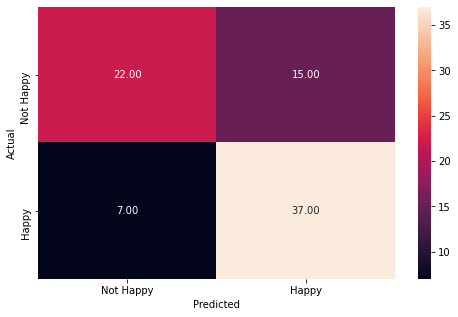

In [40]:
#checking model performance on the training data
y_pred_train_qda = qda.predict(x_train)
metrics_score(y_train, y_pred_train_qda)

              precision    recall  f1-score   support

           0       0.62      0.50      0.56        20
           1       0.66      0.76      0.70        25

    accuracy                           0.64        45
   macro avg       0.64      0.63      0.63        45
weighted avg       0.64      0.64      0.64        45



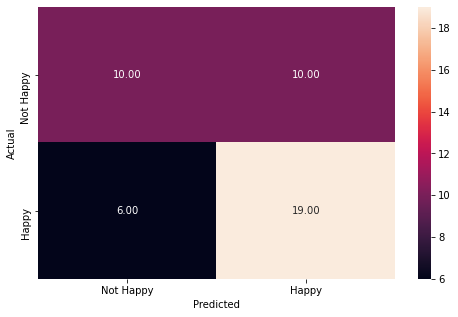

In [41]:
#checking performance of the model on the test data
y_pred_test_qda = qda.predict(x_test)
metrics_score(y_test, y_pred_test_qda)

**Observations:**
- QDA is the highest performing model yet.  Precision scores on the test set is **66%** and recall score is **76%**.  
- **The model has a high number of false positives**, i.e the model will predict that the customer is happy even though he/she is not.
- This is an **improvement to previous models** but still needs further improvement to be useful to the company.
- Let's see if tuning will make it better.

In [42]:
estimator_qda = QuadraticDiscriminantAnalysis()
parameters_qda = {
    'reg_param': (0.00001, 0.0001, 0.001,0.01, 0.1), 
    'store_covariance': (True, False),
    'tol': (0.0001, 0.001,0.01, 0.1) 
                   }

In [43]:
grid_search_qda = GridSearchCV(
    estimator=estimator_qda,
    param_grid=parameters_qda,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

              precision    recall  f1-score   support

           0       0.75      0.57      0.65        37
           1       0.70      0.84      0.76        44

    accuracy                           0.72        81
   macro avg       0.72      0.70      0.70        81
weighted avg       0.72      0.72      0.71        81



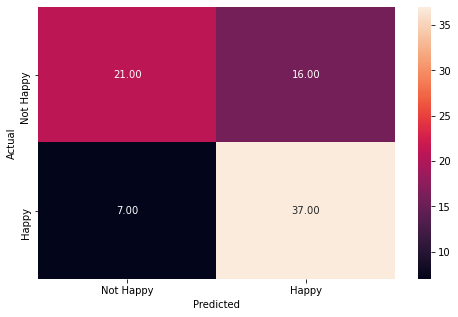

In [71]:
y_pred_train_qda = grid_search_qda.predict(x_train)
metrics_score(y_train, y_pred_train_qda)

In [44]:
qda=grid_search_qda.fit(x_train, y_train)
y_pred =qda.predict(x_test)

              precision    recall  f1-score   support

           0       0.62      0.50      0.56        20
           1       0.66      0.76      0.70        25

    accuracy                           0.64        45
   macro avg       0.64      0.63      0.63        45
weighted avg       0.64      0.64      0.64        45



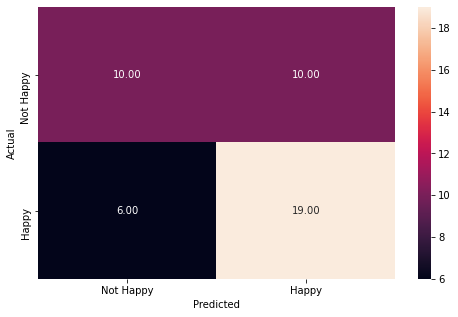

In [45]:
metrics_score(y_test, y_pred)

**Observations:**
- Tuning did not change training or test scores much.  Precision scores on the test set is still **66%** and recall score is **76%**.  
- QDA is the highest performing model yet, performing **6% better** in precision and **16% better** in recall than previous models.  
- Let's see if other algorithms will perform better.  

### Decision Tree

In [46]:
#building decision tree
dt = DecisionTreeClassifier(class_weight={0:0.452,1:0.548}, random_state=1)

In [47]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.452, 1: 0.548}, random_state=1)

              precision    recall  f1-score   support

           0       0.97      0.86      0.91        37
           1       0.90      0.98      0.93        44

    accuracy                           0.93        81
   macro avg       0.93      0.92      0.92        81
weighted avg       0.93      0.93      0.93        81



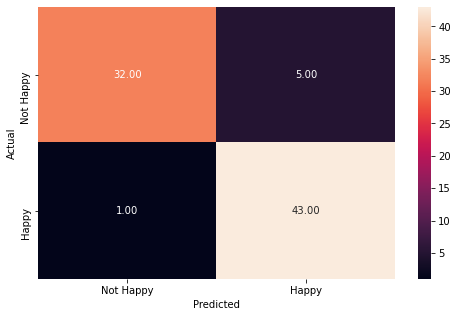

In [48]:
y_pred_train_dt_estimator = dt.predict(x_train)
metrics_score(y_train, y_pred_train_dt_estimator)

              precision    recall  f1-score   support

           0       0.55      0.60      0.57        20
           1       0.65      0.60      0.63        25

    accuracy                           0.60        45
   macro avg       0.60      0.60      0.60        45
weighted avg       0.60      0.60      0.60        45



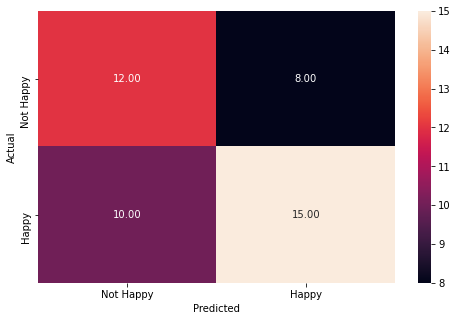

In [49]:
y_pred_test_dt_estimator = dt.predict(x_test)
metrics_score(y_test, y_pred_test_dt_estimator)

In [50]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.452,1:0.548}, random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label=1)
# Run the grid search
gridCV= GridSearchCV(dtree_estimator, parameters, scoring=scorer,cv=10)
gridCV = gridCV.fit(x_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.452, 1: 0.548}, max_depth=3,
                       min_samples_leaf=10, random_state=1)

              precision    recall  f1-score   support

           0       0.68      0.68      0.68        37
           1       0.73      0.73      0.73        44

    accuracy                           0.70        81
   macro avg       0.70      0.70      0.70        81
weighted avg       0.70      0.70      0.70        81



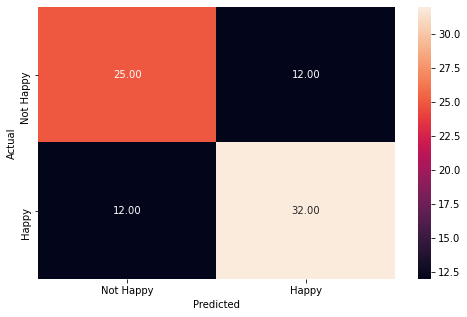

In [51]:
y_train_pred_dt=dtree_estimator.predict(x_train)
metrics_score(y_train,y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.38      0.40      0.39        20
           1       0.50      0.48      0.49        25

    accuracy                           0.44        45
   macro avg       0.44      0.44      0.44        45
weighted avg       0.45      0.44      0.45        45



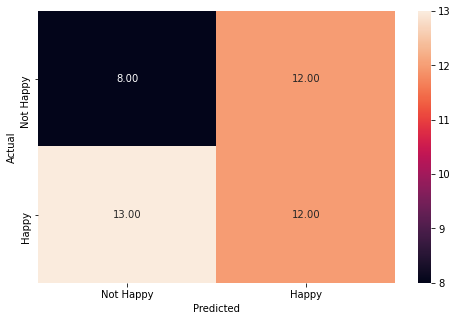

In [52]:
y_test_pred_dt=dtree_estimator.predict(x_test)
metrics_score(y_test,y_test_pred_dt)

**Observations:**
- Decision tree performed extremely very well on training set at **90% precision** **98% recall** but worse on test set which implies overfitting.  
- Tuning did close the gap a little but still implies a little overfitting.  
- On the test set, decision tree had **50% precision** and **48% recall**.  This could be a model to continue to look into to see if we could improve the scores. 
- Let's look at the last 2 algorithms and see if they will perform better.  

### Random Forest

In [53]:
#Fitting the decision tree classifier on the training datarf_estimator
rf_estimator = RandomForestClassifier(class_weight={0:0.452,1:0.548}, random_state=1)

rf_estimator.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 0.452, 1: 0.548}, random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        37
           1       0.91      0.95      0.93        44

    accuracy                           0.93        81
   macro avg       0.93      0.92      0.93        81
weighted avg       0.93      0.93      0.93        81



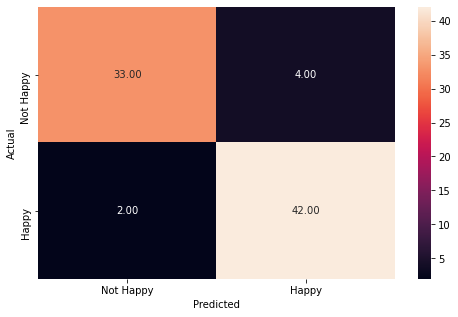

In [54]:
#Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)
metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.53      0.80      0.64        20
           1       0.73      0.44      0.55        25

    accuracy                           0.60        45
   macro avg       0.63      0.62      0.59        45
weighted avg       0.64      0.60      0.59        45



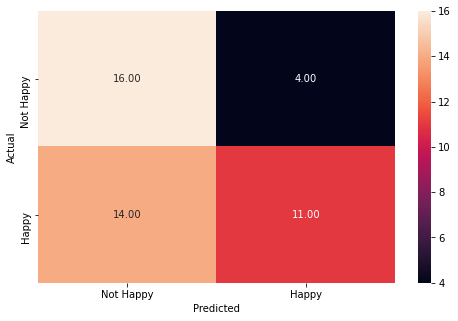

In [55]:
#Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)
metrics_score(y_test, y_pred_test_rf)

### Tuning the Random Forest

In [56]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(class_weight={0:0.452,1:0.548}, random_state=1)

# Grid of parameters to choose from
## add from article
params_rf = {  
        "n_estimators": [100,250,500],
        "min_samples_leaf": np.arange(1, 4,1),
        "max_features": [0.7,0.9,'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [57]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.452, 1: 0.548}, max_features=0.7,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        37
           1       0.91      0.95      0.93        44

    accuracy                           0.93        81
   macro avg       0.93      0.92      0.93        81
weighted avg       0.93      0.93      0.93        81



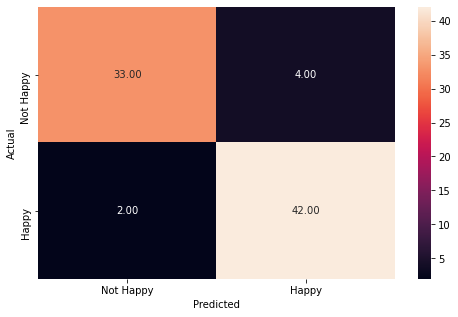

In [58]:
#Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)
metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.48      0.75      0.59        20
           1       0.64      0.36      0.46        25

    accuracy                           0.53        45
   macro avg       0.56      0.55      0.52        45
weighted avg       0.57      0.53      0.52        45



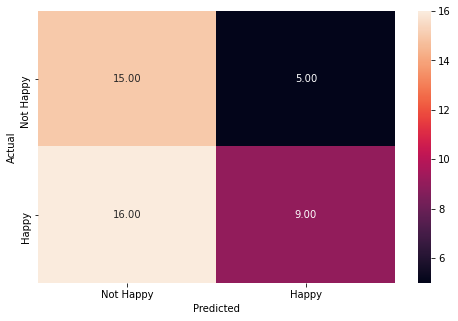

In [59]:
#Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)
metrics_score(y_test, y_pred_test_rf_tuned)

**Observations:**
- **Random Forest**, just like decision tree performed extremely very well on training set at **90% precision** **98% recall** but worse on test set which implies overfitting.  
- Tuning actually worsened the gap and still implies a overfitting.  
- On the test set, random forest had **64% precision** and **36% recall**.  Not great. 
- Let's look at the last algorithm - XG Boost.  

### XG Boost

In [60]:
xgb_classifier = XGBClassifier(use_label_encoder=False)
xgb_classifier.fit(x_train, y_train)

[10:16:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        37
           1       0.95      0.91      0.93        44

    accuracy                           0.93        81
   macro avg       0.92      0.93      0.93        81
weighted avg       0.93      0.93      0.93        81



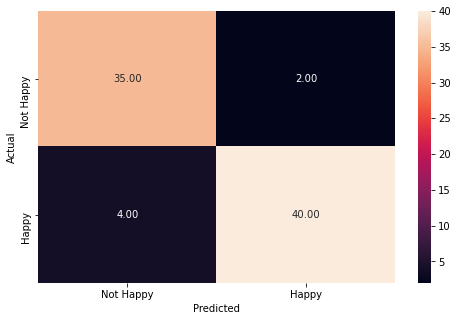

In [61]:
y_pred_train_xgb_estimator = xgb_classifier.predict(x_train)
metrics_score(y_train, y_pred_train_xgb_estimator)

              precision    recall  f1-score   support

           0       0.47      0.70      0.56        20
           1       0.60      0.36      0.45        25

    accuracy                           0.51        45
   macro avg       0.53      0.53      0.51        45
weighted avg       0.54      0.51      0.50        45



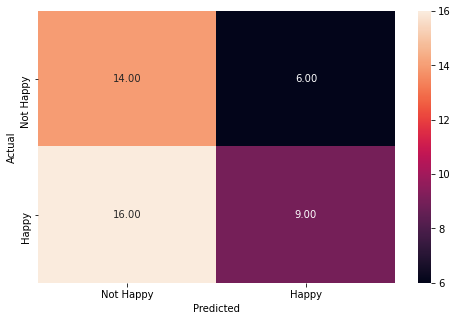

In [62]:
y_pred_test_xgb_estimator = xgb_classifier.predict(x_test)
metrics_score(y_test, y_pred_test_xgb_estimator)

In [63]:
xgb_param_dict = {
    'learning_rate':[0.05, 0.10, 0.15, 0.20],
    'max_depth':range(1,10,2),
    'min_child_weight':range(1,10,2),
    'gamma':[ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    'colsample_bytree':[ 0.3, 0.4, 0.5 , 0.7 ]
    
}

xgb = GridSearchCV(xgb_classifier, 
                    param_grid=xgb_param_dict,
                    cv=10,
                    verbose=1,
                    n_jobs=-1)

xgb.fit(x_train, y_train)

Fitting 10 folds for each of 2000 candidates, totalling 20000 fits
[10:22:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=8,
                                     num_paralle...1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact',
                                   

In [64]:
xgb.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.1,
 'learning_rate': 0.15,
 'max_depth': 3,
 'min_child_weight': 1}

In [65]:
# Set the clf to the best combination of parameters
xgb_estimator_tuned = xgb.best_estimator_

In [66]:
xgb_estimator_tuned.fit(x_train, y_train)

[10:22:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        37
           1       0.85      0.91      0.88        44

    accuracy                           0.86        81
   macro avg       0.87      0.86      0.86        81
weighted avg       0.87      0.86      0.86        81



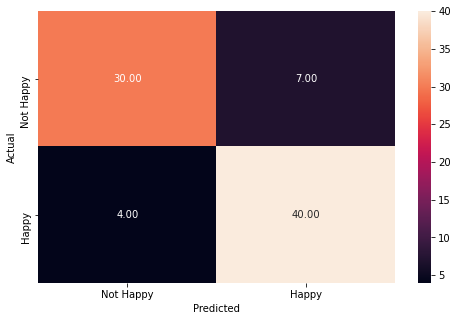

In [67]:
#Checking performance on the training data
y_pred_train_xgb_tuned = xgb_estimator_tuned.predict(x_train)
metrics_score(y_train, y_pred_train_xgb_tuned)

              precision    recall  f1-score   support

           0       0.48      0.65      0.55        20
           1       0.61      0.44      0.51        25

    accuracy                           0.53        45
   macro avg       0.55      0.55      0.53        45
weighted avg       0.55      0.53      0.53        45



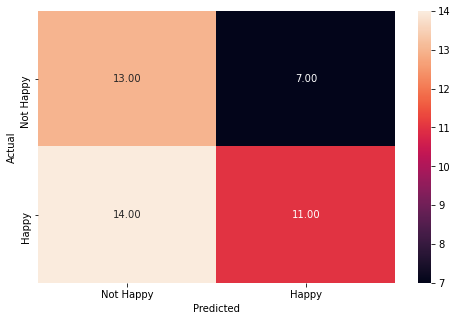

In [68]:
#Checking performance on the test data
y_pred_test_xgb_tuned = xgb_estimator_tuned.predict(x_test)
metrics_score(y_test, y_pred_test_xgb_tuned)

**Observations:**
- **XG Boost**, just like decision tree and random forest performed extremely very well on training set at **95% precision** **91% recall** but worse on test set which implies overfitting.  
- Tuning did not close the gap much and still implies a overfitting.  
- On the test set, XG Boost had **61% precision** and **44% recall**.  Not great either.

### Conclusion and Recommendations 

**Conclusions:**

- We have tried multiple models and were **able to identify the key factors involved with customer happiness** with the organization.
- The final model - **a hyperparameter-tuned QDA model**, is overfitting on the training dataset but **gives the highest scores on the testing data at 66% precision and 76% recall**.  It may be possible to further try and tune the model, and the company can use this model to predict whether a customer is happy or not.
- We only have 126 observations and it may be that more data would improve the model significantly.

**Recommendations:**

- We saw that **courier performance is the most important driver of customer satisfaction.** The organization should focus on identifying courier performance metrics to see if there are ways to improve the service to customers.  
- Related to this is **delivery on time**.  The company might improve both by looking into making delivery/courier service more streamline to insure customers get their packages on time.  
- This could mean **hiring more couriers** or **have more central distribution or package processing centers** so that it's easier for couriers to get packages to customers.  